In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import WhitespaceTokenizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [31]:
df_real=pd.read_csv('../FakeNewsDeepLearning/fakenewsnet/politifact_real.csv')

In [32]:
df_real.shape

(624, 4)

In [33]:
df_fake=pd.read_csv('../FakeNewsDeepLearning/fakenewsnet/politifact_fake.csv')

In [34]:
df_fake.shape

(432, 4)

In [35]:
df=pd.concat([df_real,df_fake],axis=0)

In [36]:
df.shape

(1056, 4)

In [37]:
df['news_type']=df['id'].apply(lambda x: x.split('_')[0])

In [38]:
df.head(10)

,id,news_url,title,tweet_ids,news_type
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...,politifact14984
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...,politifact12944
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN,politifact333
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN,politifact4358
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...,politifact779
5,politifact14064,http://www.politifact.com/truth-o-meter/statem...,Donald Trump exaggerates when he says China ha...,690248006399049728\t690254026663821312\t690276...,politifact14064
6,politifact14474,https://www.law.cornell.edu/constitution/amend...,25th Amendment,1262604762\t10969740933\t11182364398\t17507543...,politifact14474
7,politifact5276,http://americaneedsmitt.com/blog/2011/11/10/mi...,子供たちのコト。私のコト。,NaN,politifact5276
8,politifact1313,https://web.archive.org/web/20090913221204/htt...,Briefing by White House Press Secretary Robert...,13511762265\t13512918230\t13513835900\t1351424...,politifact1313
9,politifact937,https://web.archive.org/web/20080623122709/htt...,A Solar Grand Plan: Scientific American,140962137332920320\t141057766704947200\t141166...,politifact937


In [10]:
df.shape

(240, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 119
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              240 non-null    object
 1   title           240 non-null    object
 2   text            240 non-null    object
 3   url             236 non-null    object
 4   top_img         236 non-null    object
 5   authors         214 non-null    object
 6   source          236 non-null    object
 7   publish_date    162 non-null    object
 8   movies          14 non-null     object
 9   images          236 non-null    object
 10  canonical_link  230 non-null    object
 11  meta_data       240 non-null    object
 12  news_type       240 non-null    object
dtypes: object(13)
memory usage: 26.2+ KB


In [12]:
df.describe()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data,news_type
count,240,240,240,236,236,214,236,162,14,236,230,240,240
unique,120,114,114,117,110,84,17,66,7,110,111,113,1
top,Real_80-Webpage,NFL Superstar Unleashes 4 Word Bombshell on Re...,McCain Criticized Trump for Arpaio’s Pardon… S...,http://occupydemocrats.com/2016/09/28/trump-sa...,http://conservativetribune.com/wp-content/uplo...,Abc News,http://politi.co,{'$date': 1474329600000},https://www.youtube.com/embed/pcj4boVT4fc,http://static.westernjournalism.com/wp-content...,http://www.politico.com/magazine/story/2016/09...,"{""viewport"": ""width=device-width, initial-scal...",Real
freq,2,6,6,4,6,10,86,10,2,6,4,6,240


In [13]:
df.drop(['id','url', 'top_img','authors','publish_date','canonical_link','meta_data'],axis=1, inplace=True)

In [14]:
df.isnull().sum()

title          0
text           0
source         4
movies       226
images         4
news_type      0
dtype: int64

In [15]:
(df.isnull().sum())/(df.shape[0])*100

title         0.000000
text          0.000000
source        1.666667
movies       94.166667
images        1.666667
news_type     0.000000
dtype: float64

In [16]:
df['contain_movies']=df['movies'].apply(lambda x: 0 if str(x)=='nan' else 1)

In [17]:
df['contain_images']=df['images'].apply(lambda x: 0 if str(x)=='nan' else 1)

In [18]:
df.drop(['movies','images'],axis=1,inplace=True)

In [19]:
df.head(2)

,title,text,source,news_type,contain_movies,contain_images
0,Trump Just Insulted Millions Who Lost Everythi...,16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,http://occupydemocrats.com,Real,0,1
1,Famous dog killed in spot she waited a year fo...,Famous dog killed in spot she waited a year fo...,http://rightwingnews.com,Real,0,1


## EDA

In [20]:
real_order=df[df['news_type']=='Real']['source'].value_counts().sort_values(ascending=False).index

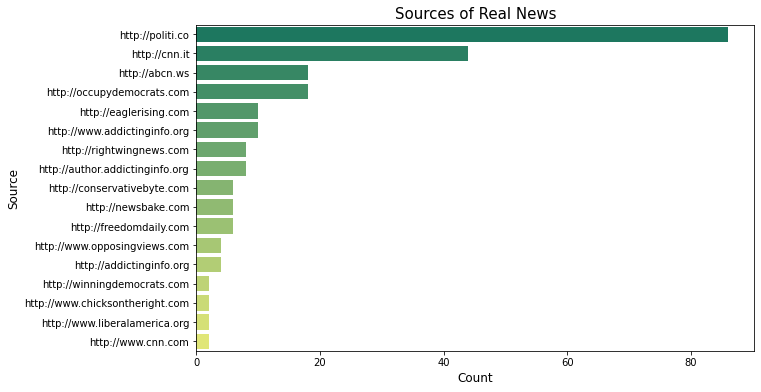

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(y='source', data=df[df['news_type']=='Real'],order=real_order,palette='summer')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of Real News',fontsize=15)
plt.show()

In [22]:
fake_order=df[df['news_type']=='Fake']['source'].value_counts().sort_values(ascending=False).index

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(y='source',data=df[df['news_type']=='Fake'],order=fake_order,palette='autumn')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of Fake News',fontsize=20)
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 720x432 with 0 Axes>

In [ ]:
new=[]
for x in df[df['news_type']=='Fake']['source'].unique():
    if x in df[df['news_type']=='Real']['source'].unique():
        new.append(x)
print(new)

In [ ]:
df['common']=df['source'].apply(lambda x: x if x in new else 0)

In [ ]:
df1=df[df['common']!=0]

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='common',data=df1,hue='news_type',palette='viridis')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.legend(loc='best', title='News Type',fontsize=10)
plt.title('Common Sources of Real and Fake News',fontsize=20)
plt.show()

In [ ]:
df.head(2)

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='contain_movies', data=df, hue='news_type', palette='PuBuGn_r')
plt.xlabel('Movies Linked to News',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(loc='best', title='News Type',fontsize=10)
plt.title('Number of Different News Type Versus Linked Movies',fontsize=18)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='contain_images', data=df, hue='news_type', palette='PuBuGn_r')
plt.xlabel('Images Linked to News',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(loc='upper left', title='News Type',fontsize=10)
plt.title('Number of Different News Type Versus Linked Images',fontsize=18)
plt.show()

### Analysis of Title and Body of News Articles

In [6]:
ps=PorterStemmer()
wst= WhitespaceTokenizer() 

##### 1. Converting text to lower case
def lower_func (x):
    return x.lower()


##### 2. Removing Numbers from the text corpus
def remove_number_func (x): 
    new=""
    for a in x:
        if a.isdigit()==False:
            new=new+a
    return new


##### 3. Removing punctuation 
def remove_punc_func(x):
    new=''
    for a in x:
        if a not in string.punctuation:
            new=new+a
    return new

##### 4. Removing special characters
def remove_spec_char_func(x):
    new=''
    for a in x:
        if (a.isalnum()==True) or (a==' '):
            new=new+a
    return(new)

##### 5. Removing english stopwords
def remove_stopwords(x):
    new=[]
    for a in x.split():
        if a not in stopwords.words('english'):
            new.append(a)
    return " ".join(new)

##### 6. Stemming words to root words
def stem_func(x):
    wordlist = word_tokenize(x)
    psstem = [ps.stem(a) for a in wordlist]
    return ' '.join(psstem)

##### 7. Removing extra whitespaces 
def remove_whitespace_func(x):
    return(wst.tokenize(x))

def compose(f, g):
    return lambda x: f(g(x))

final=compose(compose(compose(compose(compose(compose(remove_whitespace_func,stem_func),remove_stopwords),remove_spec_char_func),remove_punc_func),remove_number_func),lower_func)

##### Fake News

In [ ]:
df_fake=df[df['news_type']=='Fake']

In [ ]:
cv1 = CountVectorizer(analyzer=final)
cv1.fit(df_fake['title'])
bow1=cv1.transform(df_fake['title'])

In [ ]:
pd.DataFrame(bow1.todense()).shape

In [ ]:
new1=[]
for x in range(0,459):
    new1.append(cv1.get_feature_names()[x])

In [ ]:
matrix1=pd.DataFrame(bow1.todense(),columns=new1)

In [ ]:
sm1=[]
for x in new1:
    sm1.append(matrix1[x].sum())

In [ ]:
trans1=matrix1.transpose()

In [ ]:
trans1['sum']=sm1

In [ ]:
top1=trans1.sort_values(by='sum', ascending=False).head(20)

##### Real News

In [ ]:
df_real=df[df['news_type']=='Real']

In [ ]:
cv2 = CountVectorizer(analyzer=final)
cv2.fit(df_real['title'])
bow2=cv2.transform(df_real['title'])

In [ ]:
pd.DataFrame(bow2.todense()).shape

In [ ]:
new2=[]
for x in range(0,436):
    new2.append(cv2.get_feature_names()[x])

In [ ]:
matrix2=pd.DataFrame(bow2.todense(),columns=new2)

In [ ]:
sm2=[]
for x in new2:
    sm2.append(matrix2[x].sum())

In [ ]:
trans2=matrix2.transpose()

In [ ]:
trans2['sum']=sm2

In [ ]:
top2=trans2.sort_values(by='sum', ascending=False).head(20)

##### Concatenation

In [ ]:
top1.drop(list(range(0,91)),axis=1,inplace=True)

In [ ]:
top1['type']=['Fake']*20

In [ ]:
top2.drop(list(range(0,91)),axis=1,inplace=True)

In [ ]:
top2['type']=['Real']*20

In [ ]:
conc1=pd.concat([top1,top2])

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(y=conc1.index,x='sum',data=conc1,hue='type',palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Term Frequency of Words',fontsize=12)
plt.ylabel('Top Words in Titles',fontsize=12)
plt.legend(title='News Type',fontsize=12)
plt.title('Frequency of Words in the Title of News',fontsize=20)
plt.show()

#### Analysis of News Body

##### Fake News

In [ ]:
cv3 = CountVectorizer(analyzer=final)
cv3.fit(df_fake['text'])
bow3=cv3.transform(df_fake['text'])

In [ ]:
pd.DataFrame(bow3.todense()).shape

In [ ]:
new3=[]
for x in range(0,4958):
    new3.append(cv3.get_feature_names()[x])

In [ ]:
matrix3=pd.DataFrame(bow3.todense(),columns=new3)

In [ ]:
sm3=[]
for x in new3:
    sm3.append(matrix3[x].sum())

In [ ]:
trans3=matrix3.transpose()

In [ ]:
trans3['sum']=sm3

In [ ]:
top3=trans3.sort_values(by='sum', ascending=False).head(30)

##### Real News

In [ ]:
cv4 = CountVectorizer(analyzer=final)
cv4.fit(df_real['text'])
bow4=cv4.transform(df_real['text'])

In [ ]:
pd.DataFrame(bow4.todense()).shape

In [ ]:
new4=[]
for x in range(0,6529):
    new4.append(cv4.get_feature_names()[x])

In [ ]:
matrix4=pd.DataFrame(bow4.todense(),columns=new4)

In [ ]:
sm4=[]
for x in new4:
    sm4.append(matrix4[x].sum())

In [ ]:
trans4=matrix4.transpose()

In [ ]:
trans4['sum']=sm4

In [ ]:
top4=trans4.sort_values(by='sum', ascending=False).head(30)

##### Concatenation

In [ ]:
top3.drop(list(range(0,91)),axis=1,inplace=True)

In [ ]:
top3['type']=['Fake']*30

In [ ]:
top4.drop(list(range(0,91)),axis=1,inplace=True)

In [ ]:
top4['type']=['Real']*30

In [ ]:
conc2=pd.concat([top3,top4])

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(y=conc2.index,x='sum',data=conc2,hue='type',palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Term Frequency of Words',fontsize=12)
plt.ylabel('Top Words in Texts',fontsize=12)
plt.legend(title='News Type',fontsize=12,loc='lower right')
plt.title('Frequency of Words in the Text of News',fontsize=20)
plt.show()

#### Analysis of Title Length

In [ ]:
df['title_length']=df['title'].apply(lambda x: len(x))

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['news_type']=='Real']['title_length'])
sns.kdeplot(df[df['news_type']=='Fake']['title_length'])
plt.xlabel('Title Length',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.legend(title='News Type',fontsize=10,labels=['Real','Fake'])
plt.title('Distribuiton of Title Length for Real and Fake News',fontsize=15)
plt.show()

## Fake/Real News Classification

In [ ]:
X1=df['text']
y1=df['news_type']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [ ]:
pp.fit(X1_train,y1_train)

In [ ]:
predictions1=pp.predict(X1_test)

In [ ]:
print(confusion_matrix(y1_test, predictions1))
print('\n')
print(classification_report(y1_test, predictions1))

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [ ]:
pp.fit(X1_train,y1_train)

In [ ]:
predictions2=pp.predict(X1_test)

In [ ]:
print(confusion_matrix(y1_test, predictions2))
print('\n')
print(classification_report(y1_test, predictions2))

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [ ]:
pp.fit(X1_train,y1_train)

In [ ]:
predictions3=pp.predict(X1_test)

In [ ]:
print(confusion_matrix(y1_test, predictions3))
print('\n')
print(classification_report(y1_test, predictions3))

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [ ]:
pp.fit(X1_train,y1_train)

In [ ]:
predictions4=pp.predict(X1_test)

In [ ]:
print(confusion_matrix(y1_test, predictions4))
print('\n')
print(classification_report(y1_test, predictions4))

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [ ]:
pp.fit(X1_train,y1_train)

In [ ]:
predictions5=pp.predict(X1_test)

In [ ]:
print(confusion_matrix(y1_test, predictions5))
print('\n')
print(classification_report(y1_test, predictions5))

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [ ]:
pp.fit(X1_train,y1_train)

In [ ]:
predictions6=pp.predict(X1_test)

In [ ]:
print(confusion_matrix(y1_test, predictions6))
print('\n')
print(classification_report(y1_test, predictions6))

### Fake/Real News Detection Based on News Title

In [ ]:
X2=df['title']
y2=df['news_type']

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [ ]:
pp.fit(X2_train,y2_train)

In [ ]:
predictions7=pp.predict(X2_test)

In [ ]:
print(confusion_matrix(y2_test, predictions7))
print('\n')
print(classification_report(y2_test, predictions7))

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [ ]:
pp.fit(X2_train,y2_train)

In [ ]:
predictions8=pp.predict(X2_test)

In [ ]:
print(confusion_matrix(y2_test, predictions8))
print('\n')
print(classification_report(y2_test, predictions8))

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [ ]:
pp.fit(X2_train,y2_train)

In [ ]:
predictions9=pp.predict(X2_test)

In [ ]:
print(confusion_matrix(y2_test, predictions9))
print('\n')
print(classification_report(y2_test, predictions9))

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [ ]:
pp.fit(X2_train,y2_train)

In [ ]:
predictions10=pp.predict(X2_test)

In [ ]:
print(confusion_matrix(y2_test, predictions10))
print('\n')
print(classification_report(y2_test, predictions10))

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [ ]:
pp.fit(X2_train,y2_train)

In [ ]:
predictions11=pp.predict(X2_test)

In [ ]:
print(confusion_matrix(y2_test, predictions11))
print('\n')
print(classification_report(y2_test, predictions11))

In [ ]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [ ]:
pp.fit(X2_train,y2_train)

In [ ]:
predictions12=pp.predict(X2_test)

In [ ]:
print(confusion_matrix(y2_test, predictions12))
print('\n')
print(classification_report(y2_test, predictions12))

### Fake/Real News Detection Based on Both Body and Title of News 

In [ ]:
df['title_text']=df['title']+': ' +df['text']

In [2]:
df = pd.read_csv("buzzfeed.csv")
df

,title_text,type,label
0,"ABC News – Breaking News, Latest News, Headlin...",train,Real
1,Is it the Beginning of the End for Hillary Cli...,train,Fake
2,The Black Sphere with Kevin Jackson: Chicago E...,train,Fake
3,Trump Supreme Court Pick Sued By Feds For Raci...,train,Fake
4,Charlotte Police REVEAL What They Said To Blac...,train,Real
...,...,...,...
177,Conway: Trump will explain his Islamic State p...,test,Real
178,Angela Merkel Admits Bringing In Muslim Refuge...,test,Fake
179,Donald Trump Jr. Just Pinned A Tweet So Stupid...,test,Real
180,Donna Brazile slams Trump for not apologizing ...,test,Real


In [3]:
X3=df['title_text']
y3=df['label']

In [4]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [7]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [8]:
pp.fit(X3_train,y3_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fd3fc7ae620>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [9]:
predictions13=pp.predict(X3_test)

In [10]:
print(confusion_matrix(y3_test, predictions13))
print('\n')
print(classification_report(y3_test, predictions13))

[[19 11]
 [ 5 20]]


              precision    recall  f1-score   support

        Fake       0.79      0.63      0.70        30
        Real       0.65      0.80      0.71        25

    accuracy                           0.71        55
   macro avg       0.72      0.72      0.71        55
weighted avg       0.73      0.71      0.71        55



In [11]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [12]:
pp.fit(X3_train,y3_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [13]:
predictions14=pp.predict(X3_test)

In [14]:
print(confusion_matrix(y3_test, predictions14))
print('\n')
print(classification_report(y3_test, predictions14))

[[24  6]
 [ 7 18]]


              precision    recall  f1-score   support

        Fake       0.77      0.80      0.79        30
        Real       0.75      0.72      0.73        25

    accuracy                           0.76        55
   macro avg       0.76      0.76      0.76        55
weighted avg       0.76      0.76      0.76        55



In [15]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [16]:
pp.fit(X3_train,y3_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fd3fc7ae620>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [17]:
predictions15=pp.predict(X3_test)

In [18]:
print(confusion_matrix(y3_test, predictions15))
print('\n')
print(classification_report(y3_test, predictions15))

[[16 14]
 [ 4 21]]


              precision    recall  f1-score   support

        Fake       0.80      0.53      0.64        30
        Real       0.60      0.84      0.70        25

    accuracy                           0.67        55
   macro avg       0.70      0.69      0.67        55
weighted avg       0.71      0.67      0.67        55



In [19]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    ])

In [20]:
pp.fit(X3_train,y3_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [21]:
predictions16=pp.predict(X3_test)

In [22]:
print(confusion_matrix(y3_test, predictions16))
print('\n')
print(classification_report(y3_test, predictions16))

[[19 11]
 [ 3 22]]


              precision    recall  f1-score   support

        Fake       0.86      0.63      0.73        30
        Real       0.67      0.88      0.76        25

    accuracy                           0.75        55
   macro avg       0.77      0.76      0.74        55
weighted avg       0.77      0.75      0.74        55



In [23]:
pp=Pipeline([
    ('bow',CountVectorizer(analyzer=final)),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [24]:
pp.fit(X3_train,y3_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function compose.<locals>.<lambda> at 0x7fd3fc7ae620>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [25]:
predictions17=pp.predict(X3_test)

In [26]:
print(confusion_matrix(y3_test, predictions17))
print('\n')
print(classification_report(y3_test, predictions17))

[[21  9]
 [ 7 18]]


              precision    recall  f1-score   support

        Fake       0.75      0.70      0.72        30
        Real       0.67      0.72      0.69        25

    accuracy                           0.71        55
   macro avg       0.71      0.71      0.71        55
weighted avg       0.71      0.71      0.71        55



In [27]:
pp=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [28]:
pp.fit(X3_train,y3_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [29]:
predictions18=pp.predict(X3_test)

In [30]:
print(confusion_matrix(y3_test, predictions18))
print('\n')
print(classification_report(y3_test, predictions18))

[[21  9]
 [ 5 20]]


              precision    recall  f1-score   support

        Fake       0.81      0.70      0.75        30
        Real       0.69      0.80      0.74        25

    accuracy                           0.75        55
   macro avg       0.75      0.75      0.75        55
weighted avg       0.75      0.75      0.75        55



In [32]:
# print('Text_Random Forest Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions1)))
# print('Text_Random Forest Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions2)))
# print('Text_Naive Bayes Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions3)))
# print('Text_Naive Bayes Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions4)))
# print('Text_Passive Aggressive Classifier_With Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions5)))
# print('Text_Passive Aggressive Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y1_test,predictions6)))
# print('\n')
# print('Title_Random Forest Classifier_With Text Preprocessing: ', round(100*accuracy_score(y2_test,predictions7)))
# print('Title_Random Forest Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y2_test,predictions8)))
# print('Title_Naive Bayes Classifier_With Text Preprocessing: ', round(100*accuracy_score(y2_test,predictions9)))
# print('Title_Naive Bayes Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y2_test,predictions10)))
# print('Title_Passive Aggressive Classifier_With Text Preprocessing: ', round(100*accuracy_score(y2_test,predictions11)))
# print('Title_Passive Aggressive Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y2_test,predictions12)))
# print('\n')
print('Text&Title_Random Forest Classifier_With Text Preprocessing: ', round(100*accuracy_score(y3_test,predictions13)))
print('Text&Title_Random Forest Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y3_test,predictions14)))
print('Text&Title_Naive Bayes Classifier_With Text Preprocessing: ', round(100*accuracy_score(y3_test,predictions15)))
print('Text&Title_Naive Bayes Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y3_test,predictions16)))
print('Text&Title_Passive Aggressive Classifier_With Text Preprocessing: ', round(100*accuracy_score(y3_test,predictions17)))
print('Text&Title_Passive Aggressive Classifier_Without Text Preprocessing: ', round(100*accuracy_score(y3_test,predictions18)))

Text&Title_Random Forest Classifier_With Text Preprocessing:  71.0
Text&Title_Random Forest Classifier_Without Text Preprocessing:  76.0
Text&Title_Naive Bayes Classifier_With Text Preprocessing:  67.0
Text&Title_Naive Bayes Classifier_Without Text Preprocessing:  75.0
Text&Title_Passive Aggressive Classifier_With Text Preprocessing:  71.0
Text&Title_Passive Aggressive Classifier_Without Text Preprocessing:  75.0
